# Yolo v3 Rotten Banana Detection

In [ ]:

from google.colab import drive
drive.mount('/content/drive/') # Using Google Drive


Mounted at /content/drive/


In [ ]:
import os

os.chdir("/content/drive/MyDrive/") # Using Google Drive
os.chdir("rottenAI/darknet-banana/") 

In [ ]:
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg 

# Download Darknet-53, pretrained weights, network structure

In [ ]:
!git clone https://github.com/pjreddie/darknet
!wget https://pjreddie.com/media/files/yolov3.weights
!wget https://pjreddie.com/media/files/darknet53.conv.74

In [ ]:
!make

#Train the model
#### before training, please edit the following files accordingly

*   cfg/yolov3-voc.cfg
*   cfg/yolov3-voc-test.cfg
*   data/voc.names
*   data/coco.names
*   cfg/voc.data
*   MakeFile

In [ ]:
!./darknet detector train cfg/voc.data cfg/yolov3-voc.cfg darknet53.conv.74


# Test 1 images

In [ ]:
!./darknet detector test cfg/voc.data cfg/yolov3-voc-test.cfg backup/yolov3-voc.backup VOCdevkit/VOC2007/JPEGImages/109.jpg

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32  0.299 BFLOPs
    1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64  1.595 BFLOPs
    2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32  0.177 BFLOPs
    3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64  1.595 BFLOPs
    4 res    1                 208 x 208 x  64   ->   208 x 208 x  64
    5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128  1.595 BFLOPs
    6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64  0.177 BFLOPs
    7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128  1.595 BFLOPs
    8 res    5                 104 x 104 x 128   ->   104 x 104 x 128
    9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64  0.177 BFLOPs
   10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128  1.595 BFLOPs
   11 res    8                 104 x 

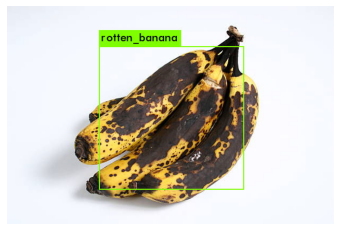

In [ ]:
lena = mpimg.imread('predictions.jpg') 

plt.imshow(lena) 
plt.axis('off') 
plt.show()

# Continue train the model

In [ ]:
!./darknet detector train cfg/voc.data cfg/yolov3-voc.cfg backup/yolov3-voc.backup -dont_show


# Calculate mAP

In [ ]:
!./darknet detector valid cfg/voc.data cfg/yolov3-voc-test.cfg backup/yolov3-voc_900.weights -out "" -gpu 0 -thresh .5


In [ ]:
!python2 compute_map.py

('ap', 0.8886113886113887)
